In [11]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import style
import datetime as dt1
from datetime import datetime as dt
from sklearn import preprocessing, model_selection, svm
from sklearn.linear_model import LinearRegression
import math
from subprocess import check_output



In [8]:
# print(check_output(["ls", "../stock_dataset"]).decode("utf8"))

In [12]:
df=pd.read_csv('C:/Users/swamy/OneDrive/Desktop/Predictive Analytics/stock_dataset/prices.csv')
df.tail()

,date,symbol,open,close,low,high,volume
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30 00:00:00,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0
851263,2016-12-30 00:00:00,FTV,54.200001,53.630001,53.389999,54.480000,705100.0


In [14]:
df.shape

(1762, 7)

In [13]:
df=df.loc[df['symbol'] == 'CSCO']
print(df.tail())

              date symbol       open      close        low       high  \
848874  2016-12-23   CSCO  30.540001  30.530001  30.400000  30.600000   
849374  2016-12-27   CSCO  30.639999  30.680000  30.600000  30.820000   
849874  2016-12-28   CSCO  30.700001  30.420000  30.350000  30.770000   
850374  2016-12-29   CSCO  30.370001  30.459999  30.330000  30.549999   
850874  2016-12-30   CSCO  30.559999  30.219999  30.129999  30.600000   

            volume  
848874   9167500.0  
849374  14175500.0  
849874  12022200.0  
850374  10995600.0  
850874  20190000.0  


In [15]:
forecast_col = 'close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))
print(forecast_out)
df['label'] = df[forecast_col].shift(-forecast_out)
print(df.head())

18
            date symbol       open      close        low       high  \
356   2010-01-04   CSCO  24.110001  24.690001  24.010000  24.840000   
824   2010-01-05   CSCO  24.600000  24.580000  24.379999  24.730000   
1292  2010-01-06   CSCO  24.540001  24.420000  24.340000  24.740000   
1760  2010-01-07   CSCO  24.299999  24.530001  24.170000  24.570000   
2228  2010-01-08   CSCO  24.379999  24.660000  24.250000  24.700001   

          volume      label  
356   59853700.0  22.469999  
824   45124500.0  22.730000  
1292  35715700.0  23.020000  
1760  31531200.0  23.070000  
2228  39115900.0  23.160000  


In [16]:
X = np.array(df.drop(['label','symbol','date'], axis=1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
y = np.array(df['label'])[:-forecast_out]

assert X.shape[0] == y.shape[0], "X and y must have the same number of samples"

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

In [17]:
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print(confidence)


0.8815023563077008


[29.09486835 29.68083011 29.7946538  29.675679   29.75302795 30.19634203
 30.43782593 30.27574481 30.12782005 30.39090803 30.35569857 30.17694812
 30.06722148 30.17279425 30.32338955 30.28246505 30.11017275 30.08114677]
2016-12-30
                    date symbol  open  close  low  high  volume  label  \
2017-01-13 00:00:00  NaN    NaN   NaN    NaN  NaN   NaN     NaN    NaN   
2017-01-14 00:00:00  NaN    NaN   NaN    NaN  NaN   NaN     NaN    NaN   
2017-01-15 00:00:00  NaN    NaN   NaN    NaN  NaN   NaN     NaN    NaN   
2017-01-16 00:00:00  NaN    NaN   NaN    NaN  NaN   NaN     NaN    NaN   
2017-01-17 00:00:00  NaN    NaN   NaN    NaN  NaN   NaN     NaN    NaN   

                      Forecast  
2017-01-13 00:00:00  30.172794  
2017-01-14 00:00:00  30.323390  
2017-01-15 00:00:00  30.282465  
2017-01-16 00:00:00  30.110173  
2017-01-17 00:00:00  30.081147  


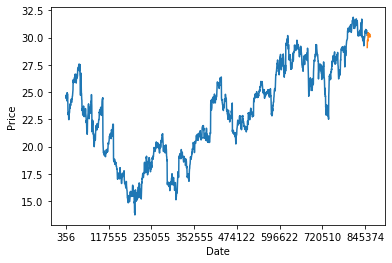

In [19]:
forecast_set = clf.predict(X_lately)
print(forecast_set)
df['Forecast'] = np.nan
last_date = df.iloc[-1].date
print(last_date)
last_date=dt.strptime(last_date, '%Y-%m-%d').timestamp()
last_unix = last_date
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = dt.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
print(df.tail())
df['close'].plot()
df['Forecast'].plot()
#plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()